**Introdução à Visão Computacional com Jetson Nano e Raspberry PI - Parte 3**
---
**Referências:**
*   Open Source Computer Vision Library: https://opencv.org
*   Tutorials: https://docs.opencv.org/4.x/d9/df8/tutorial_root.html
*   Many Examples: https://www.kaggle.com/code/bulentsiyah/learn-opencv-by-examples-with-python

**Montando o drive**
---


In [24]:
# Monta o drive da Google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Processamento básico de Imagens**
---


In [25]:
# Importa as bibliotecas
# numpy (computação numérica), matplotlib (visualização de dados)
# cv2 (Open Source Computer Vision)
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Detecção de Objetos

---

*   Uma única imagem pode possuir vários objetos de interesse
*   Detecção de Objetos consiste em localizar diferentes objetos de diferentes classes marcando a posição com um bounding-box




**Detecção de Face**


---


*   O OpenCV fornece modelos pré-treinados para detectar diferentes objetos em uma imagem, como os olhos de uma pessoa, sorriso, parte superior do corpo e até a placa de um veículo
*   Existem diferentes classificadores integrados ao OpenCV no repositório GitHub da biblioteca
*   Ver mais em https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html


In [26]:
# Carregar o classificador Haar Cascade pré-treinado
cascPath = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

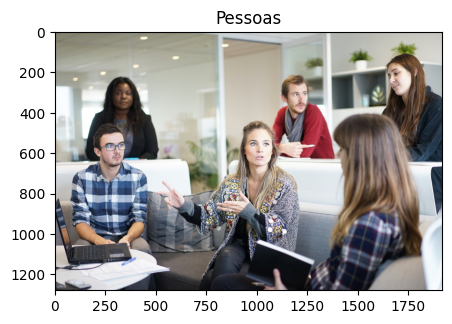

In [27]:
# NO GOOGLE COLAB
image = cv2.imread('/content/drive/MyDrive/Visao/midias/imagens/people.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.title("Pessoas")
plt.imshow(image)


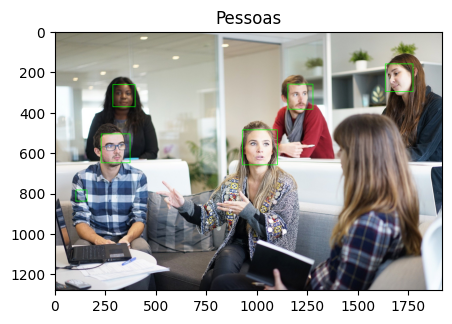

In [28]:
# Detectar faces em diferente escalas no frame
faces = faceCascade.detectMultiScale(
        image,
        scaleFactor=1.1, # Altera tamanho da imagem para facilitar a detecção, 1.1 reduz em 10%
        minNeighbors=5, # Detecções próximas para considerar detecção válida
        minSize=(50, 50), # Menor objeto a detectar
        flags=cv2.CASCADE_SCALE_IMAGE
)
    #xi,yi,xf,yf=0,0,0,0 ver depois

# Desenhar um retângulo ao redor das faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

   #xi= x
   #yi= y
   #xf= x+w
   #yf= y+h

plt.figure(figsize=(5, 5))
plt.title("Pessoas")
plt.imshow(image)

# Detecção de Contornos
---
*   Algumas vezes queremos identificar diferentes elementos na imagem sem saber inicialmente a classe do objeto
*   Uma forma genérica de separar objetos consiste em analisar contornos na imagem e separar as regiões de cada contorno

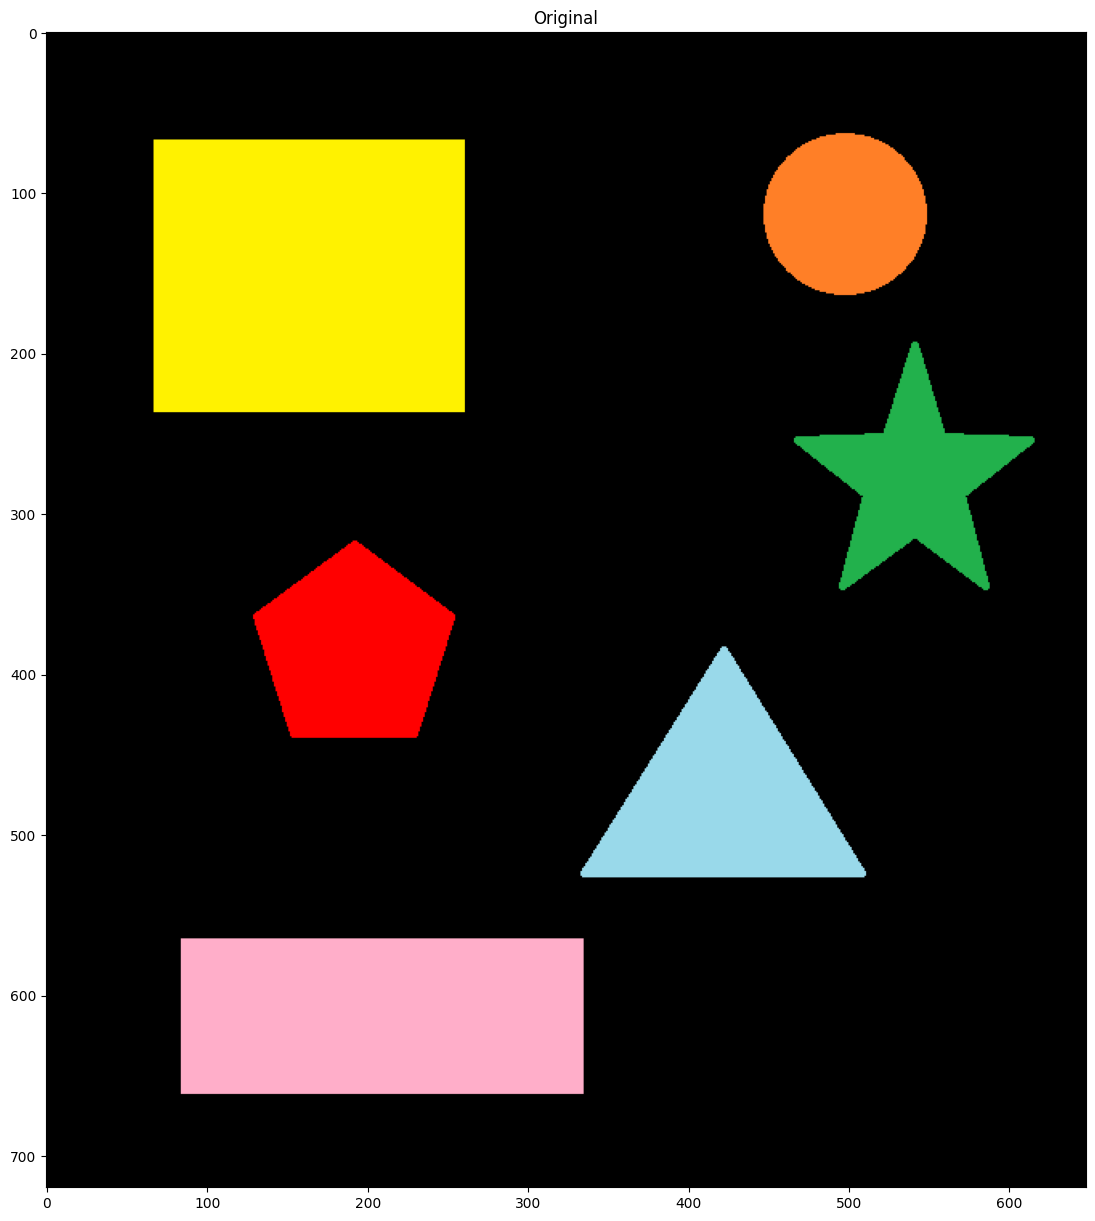

In [29]:
# NO GOOGLE COLAB
#image = cv2.imread('/content/drive/MyDrive/Visao/midias/imagens/carro-autonomo2.jpg')
image = cv2.imread('/content/drive/MyDrive/Visao/midias/imagens/someshapes.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.title("Original")
plt.imshow(image)

**Algoritmo Canny**
*   O algoritmo de Canny é um método popular e eficiente para detecção de bordas em imagens, desenvolvido por John Canny em 1986.
*   Ele funciona em várias etapas para identificar bordas de maneira robusta, reduzindo ruído e garantindo que as bordas detectadas sejam precisas e únicas.
*   O algoritmo utiliza derivadas (como Sobel) para calcular a magnitude e a direção do gradiente em cada pixel.
*   Esses valores ajudam a identificar mudanças bruscas na intensidade, que indicam bordas.
*   A história do algoritmo encontra-se em https://en.m.wikipedia.org/wiki/Canny_edge_detector


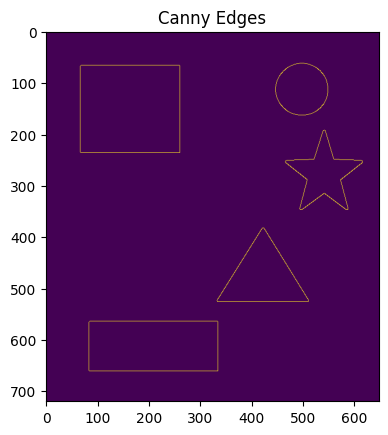

In [30]:
# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Algoritmo de detecção de bordas
edged = cv2.Canny(gray, 30, 200)

plt.title("Canny Edges")
plt.imshow(edged)

Number of Contours found = 5


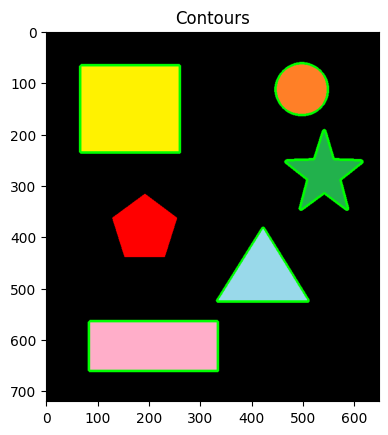

In [31]:
# Achando contornos
# findContours altera a imagem (pode ser interessante fazer uma cópia)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("Number of Contours found = " + str(len(contours)))

# Desenha contornos
# '-1' no 3o parâmetro desenha todos
cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.title("Contours")
plt.imshow(image)

# Video Analysis
*   A análise de vídeos tem tarefas que podem ser aplicadas em cada frame individualmente.
*   Uma tarefa interessante consiste em analisar diferenças entre frames.



**Background Subtraction**
---
*   Background Subtraction (ou subtração de fundo) é uma técnica em visão computacional usada para segmentar objetos em movimento (foreground) de um fundo estático em uma sequência de imagens ou em vídeos
*   É amplamente utilizada em aplicações como vigilância por vídeo, rastreamento de objetos e análise de tráfego
*   A ideia principal do background subtraction é manter um modelo do fundo da cena (background) e subtrair esse modelo da imagem ou quadro atual
*  Isso resulta em uma máscara binária que destaca as áreas que diferem do fundo, geralmente os objetos em movimento

In [32]:
from IPython.display import Video
Video('/content/drive/MyDrive/Visao/midias/videos/Background_Subtraction_Tutorial_frame.mp4',embed=True,width=800, height=450)


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Link do video
video_path = '/content/drive/MyDrive/Visao/midias/videos/Background_Subtraction_Tutorial_frame.mp4'

# Captura vídeo (pode ser ao vivo de uma câmera)
capture = cv2.VideoCapture(video_path)
largura = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
altura = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(capture.get(cv2.CAP_PROP_FPS))

# Prepara um vídeo a ser gravado
out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc(*'mp4v'), fps, (largura, altura))

# Algoritmo de Subtração de fundo
backSub = cv2.createBackgroundSubtractorMOG2()

# Loop sobre os frames
while True:
    # Captura 1 frame
    ret, frame = capture.read()

    # Se não retornar frame, sai
    if frame is None:
        break

    # Aplica algoritmo
    fgMask = backSub.apply(frame)

    # Marcando elementos diferentes com remoção de ruído (opening) e detecção de contorno
    fgMask = cv2.morphologyEx(fgMask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))
    contours, hierarchy = cv2.findContours(fgMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    fgMask = cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB)
    cv2.drawContours(fgMask, contours, -1, (0,255,0), 3)

    # Salva o frame no arquivo de vídeo
    out.write(fgMask)

# Fecha captura e arquivo de saída
capture.release()
out.release()

In [35]:
!ffmpeg -y -i output.mp4 -an -vcodec libx264 -crf 23 output2.mp4 -loglevel quiet
# Mostra vídeo
Video('output2.mp4',embed=True,width=800, height=450)

**Detecção de Objetos com DL/YOLO**
*   Detecção de objetos é uma tarefa básica da Visão Computacional que consiste em localizar múltiplos objetos de diferentes classes em uma imagem
*   Detecção de objetos é uma tarefa básica da Visão Computacional que consiste em localizar múltiplos objetos de diferentes classes em uma imagem
*  A Inteligência Artificial, por meio das redes neurais convolucionais, proporcionaram avanços importantes para treinar modelos para esta tarefa
*  Um dos mais populares é o YOLO (You Only Look Once)
*   Ver mais em:https://docs.ultralytics.com/pt/models/yolov8/#overview

In [36]:
# Lib com modelo Yolo pré-treinado
# Site https://www.ultralytics.com/pt
!pip install ultralytics

In [38]:
import cv2
from ultralytics import YOLO
from IPython.display import Video

# Escolha do YOLOv8 medium, pré-treinado no COCO dataset
'''
A versão mais nova e oficial da Ultralytics
yolov8n.pt → Nano (mais leve)
yolov8s.pt → Small
yolov8m.pt → Medium
yolov8l.pt → Large
yolov8x.pt → Extra large
'''
model = YOLO('yolov8n.pt')

In [39]:
# Link do video
video_path = '/content/drive/MyDrive/Visao/midias/videos/Background_Subtraction_Tutorial_frame.mp4'

# Captura vídeo (pode ser ao vido de uma câmera)
capture = cv2.VideoCapture(video_path)
largura = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
altura = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(capture.get(cv2.CAP_PROP_FPS))

# Prepara um vídeo a ser gravado
out = cv2.VideoWriter('yolo.mp4',cv2.VideoWriter_fourcc(*'mp4v'), fps, (largura, altura))

# Loop sobre os frames
while True:
    # Captura 1 frame
    ret, frame = capture.read()

    # Se não retornar frame, sai
    if frame is None:
        break

    # Roda Yolo em um frame
    results = model(frame, verbose=False)

    # Analisa detecções
    for r in results:
        boxes = r.boxes #retangulos dos objetos detectados
        for box in boxes:
            #if box.cls == 0:  # verifica classe do objeto (0 é pessoa no COCO)
                confidence = box.conf.item() # nível de confidência da detecção 0.0-1.0
                if confidence > 0.6: # confidence threshold setting
                    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist()) # coordenadas
                    # Desenha retangulo
                    cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2) #img, ponto inicial, ponto final, cor e espessura
                    # Adicionar o texto à imagem
                    cv2.putText(frame, f"{confidence:.2f}", (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)

    # Salva o frame no arquivo de vídeo
    out.write(frame)

# Fecha captura e arquivo de saída
capture.release()
out.release()

In [40]:
!ffmpeg -y -i yolo.mp4 -an -vcodec libx264 -crf 23 yolo2.mp4 -loglevel quiet
# Mostra vídeo
Video('yolo2.mp4',embed=True,width=800, height=450)

O Yolo retorna vários detalhes da detecção:

    cls (classe): Tipo do objeto. Ex. Person = 0
    conf (nível de confiança da detecção)
    xyxy (bounding boxes detectados)

Outras classes
(https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml):
       
*   0:person / 1:bicycle / 2:car   / 3:motorcycle / 4:airplane / 5:bus
*   6:train  / 7:truck   / 8:boat  / 9:traffic light / etc.






  
